In [1]:
import torch
from torchtext.vocab import GloVe
import numpy as np

In [2]:
def cosinesim(u, v):
    sim = torch.dot(u, v) / (torch.norm(u)* torch.norm(v))
    return sim

global_vectors = GloVe(name='840B', dim=300)

In [3]:
examples = ['China', 'Japan', 'Vietnam', 'India', 'Iraq', 'Iran', 'Egypt', 'Algeria','Sudan', 'France', 'Italy', 'Spain', 'UK', 'Russia', 'Sweden', 'Norway', 'Germany', 'USA', 'Colombia', 'Brazil']
people = ['Chinese', 'Japanese', 'Vietnamese', 'Indian', 'Iraqis', 'Iranian', 'Egyptians', 'Algerians','Sudanese', 'French', 'Italians', 'Spainish', 'British', 'Russians', 'Swedish', 'Norwegians', 'German', 'Americans', 'Colombians', 'Brazilians' ]
positive_words = ['good', 'amazing','fascinating', 'beatiful', 'attractive', 'hopeful', 'productive', 'popular', 'pleasant', 'peaceful', 'interesting', 'great', 'safe', 'fresh', 'calm', 'joyful', 'cool', 'pretty', 'charming', 'alive']
negtive_words = ['bad', 'terrible', 'dirty', 'ugly', 'evil', 'boring', 'scary', 'pathetic', 'miserable', 'corrupted', 'cruel', 'greedy', 'unpleasant', 'dangerous', 'deserted', 'polluted', 'creepy', 'bleak', 'dull', 'horrifying']

ex = global_vectors.get_vecs_by_tokens(examples, lower_case_backup=True)
pp = global_vectors.get_vecs_by_tokens(people, lower_case_backup=True)
pos = global_vectors.get_vecs_by_tokens(positive_words, lower_case_backup=True)
neg = global_vectors.get_vecs_by_tokens(negtive_words, lower_case_backup=True)

In [4]:
postive_matrix = np.zeros((len(examples), len(positive_words)))

for i, country in enumerate(examples):
    for j, p_word in enumerate(positive_words):
        postive_matrix[i, j] = cosinesim(ex[i], pos[j])
        

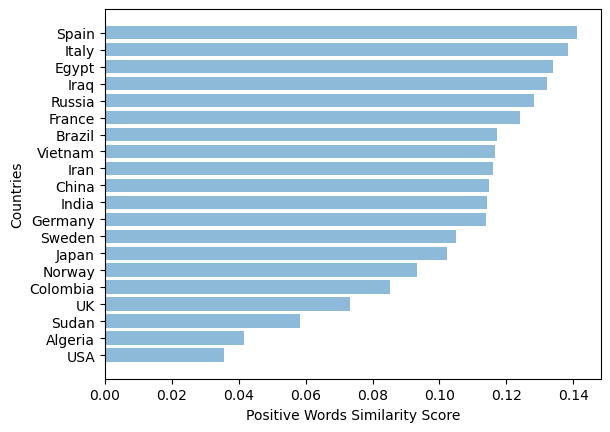

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

postive_score = np.mean(postive_matrix, axis=1)

y_pos = np.arange(len(examples))

sort_index = np.argsort(postive_score)
repostive_score = np.sort(postive_score)
re_examples = np.array(examples)[sort_index]

plt.barh(y_pos, repostive_score, align='center', alpha=0.5)
plt.yticks(y_pos, list(re_examples))
plt.ylabel('Countries')
plt.xlabel('Positive Words Similarity Score')

plt.show()

In [6]:
negtive_matrix = np.zeros((len(examples), len(negtive_words)))

for i, country in enumerate(examples):
    for j, p_word in enumerate(negtive_words):
        negtive_matrix[i, j] = cosinesim(ex[i], neg[j])

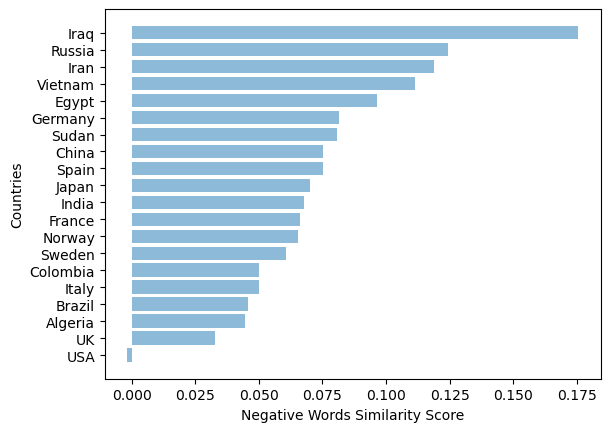

In [7]:
neg_score = np.mean(negtive_matrix, axis=1)

y_pos = np.arange(len(examples))

sort_index = np.argsort(neg_score)
reneg_score = np.sort(neg_score)
re_examples = np.array(examples)[sort_index]

plt.barh(y_pos, reneg_score, align='center', alpha=0.5)
plt.yticks(y_pos, list(re_examples))
plt.ylabel('Countries')
plt.xlabel('Negative Words Similarity Score')

plt.show()

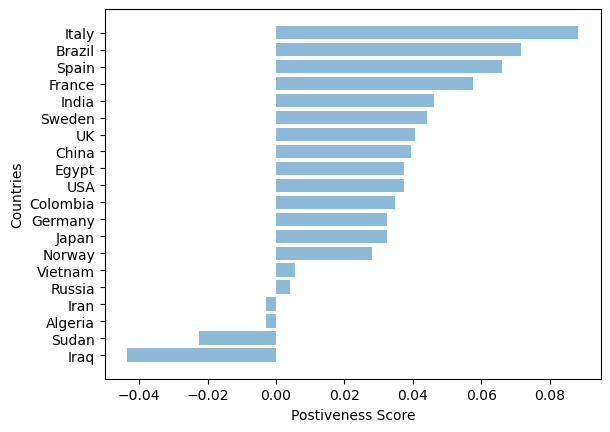

In [8]:
# postive over negative to make them on the same scale
y_pos = np.arange(len(examples))
country_pos = postive_score - neg_score

sort_index = np.argsort(country_pos)
recountry_pos = np.sort(country_pos)
re_examples = np.array(examples)[sort_index]

plt.barh(y_pos, recountry_pos, align='center', alpha=0.5)
plt.yticks(y_pos, list(re_examples))
plt.ylabel('Countries')
plt.xlabel('Postiveness Score')

plt.show()

In [9]:
postive_matrix = np.zeros((len(people), len(positive_words)))

for i, country in enumerate(people):
    for j, p_word in enumerate(positive_words):
        postive_matrix[i, j] = cosinesim(pp[i], pos[j])
        

In [10]:
postive_score = np.mean(postive_matrix, axis=1)

In [11]:
negtive_matrix = np.zeros((len(people), len(negtive_words)))

for i, country in enumerate(people):
    for j, p_word in enumerate(negtive_words):
        negtive_matrix[i, j] = cosinesim(pp[i], neg[j])

In [12]:
neg_score = np.mean(negtive_matrix, axis=1)

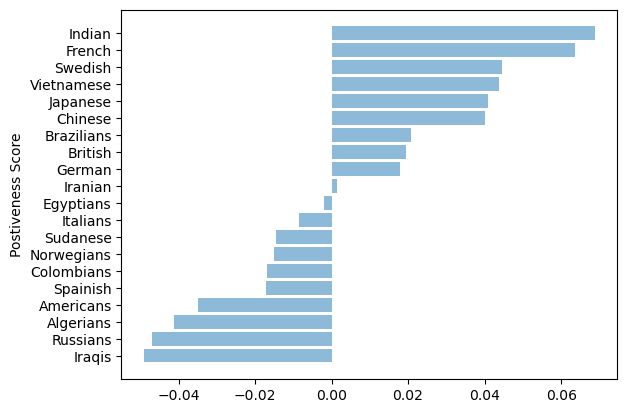

In [13]:
# postive over negative to make them on the same scale
y_pos = np.arange(len(people))
people_pos = postive_score - neg_score

sort_index = np.argsort(people_pos)
repeople_pos = np.sort(people_pos)
re_people = np.array(people)[sort_index]

plt.barh(y_pos, repeople_pos, align='center', alpha=0.5)
plt.yticks(y_pos, re_people)
plt.ylabel('Citizens')
plt.ylabel('Postiveness Score')

plt.show()

In [14]:
import scipy.stats
result = scipy.stats.linregress(people_pos, country_pos)
result.slope

0.38041899567490345

In [15]:
result.intercept

0.02753068033532276

In [16]:
result.pvalue

0.058577395254225825

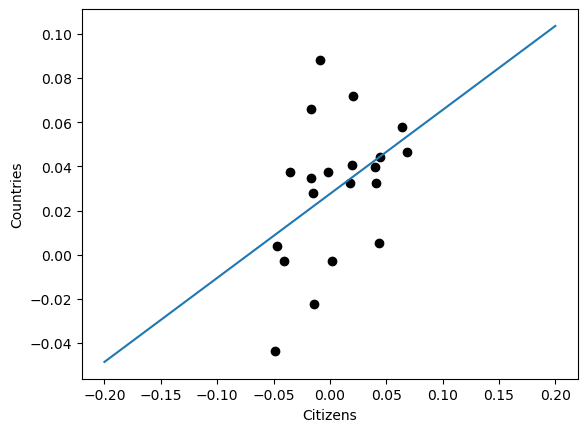

In [17]:
x = np.linspace(-0.2,0.2,50)
y = x * result.slope + result.intercept
plt.scatter(people_pos, country_pos, c='black')
plt.xlabel('Citizens')
plt.ylabel('Countries')
plt.plot(x, y)